<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 2: Linear Regression</h3>
<h3 align="center">27/09/2018</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

#### Example 1: Linear Regression Visualization

In [2]:
def create_basis(x, degree=1):
    x = np.asarray(x) #a 1d array
    X = [x**i for i in range(0,degree+1)] #include 0 as we want a column of 1s
    X = np.asarray(X).T
    return X

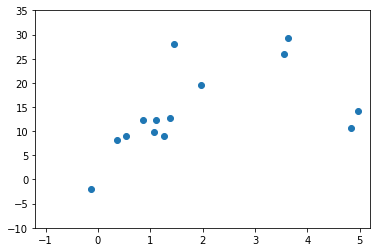

In [3]:
#true model parameters
beta_true = np.asarray([1, 10, -0.5, 0.25, -0.1])

np.random.seed(50) ##to produce the same result each time, comment this line for a truely difference sample
no_of_points = 14

x = np.random.uniform(-1,5,no_of_points)
A_true= create_basis(x, degree=4)
y = np.dot(A_true,beta_true)
y += 4*np.random.normal(0,1,len(y)) #add a normally distributed noise with standard deviation of 4 (variance of 16)
plt.scatter(x,y)

#set plot limits for using later
x_lim = np.asarray([-1.2,5.2]) 
y_lim = np.asarray([-10,35])
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

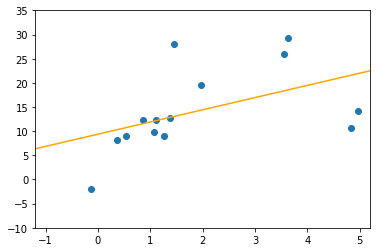

In [4]:
#least square model
plt.scatter(x,y)

A_linear = create_basis(x, degree=1)
beta_linear = np.dot(np.dot(np.linalg.inv((np.dot(A_linear.T, A_linear))), A_linear.T), y)

x_lim_lin = x_lim
A_lim_lin = create_basis(x_lim_lin, degree=1)
y_lim_lin = np.dot(A_lim_lin, beta_linear)

plt.plot(x_lim_lin, y_lim_lin, c="orange")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

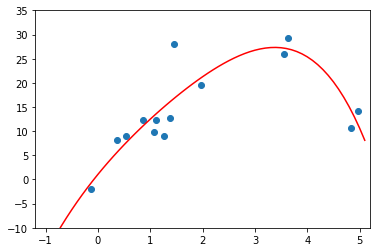

In [5]:
#least square model for regression with 4th degree polynomial basis expansion
plt.scatter(x,y)

A_poly4 = create_basis(x, degree=4)
beta_poly4 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly4.T, A_poly4))), A_poly4.T), y)

x_lim_p4 = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_p4 = create_basis(x_lim_p4, degree=4)
y_lim_p4 = np.dot(A_lim_p4, beta_poly4)

plt.plot(x_lim_p4, y_lim_p4, c="red")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

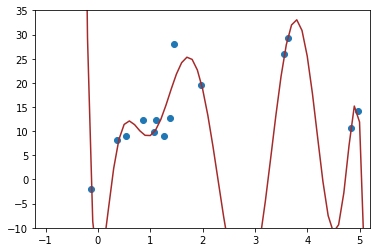

In [6]:
#least square model for regression with 9th degree polynomial basis expansion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)
beta_poly9 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly9.T, A_poly9))), A_poly9.T), y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

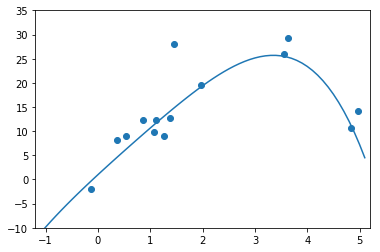

In [7]:
#true model before adding noise
plt.scatter(x,y)

x_lim_true = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_true= create_basis(x_lim_true, degree=4)
y_true_model = np.dot(A_lim_true, beta_true)

plt.plot(x_lim_true, y_true_model)

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 2: Ridge Regression (Run Example 1 to get the same model)

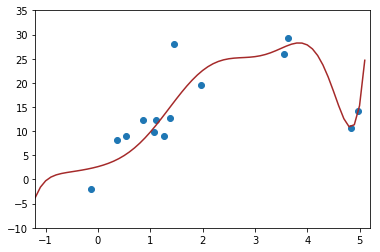

In [8]:
#least square model for regression with 9th degree polynomial basis expansion, with regularizaion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)

lambda_ = 4
beta_poly9 = np.dot(A_poly9.T, A_poly9) + lambda_*np.eye(A_poly9.shape[1]);
beta_poly9 = np.linalg.inv(beta_poly9)
beta_poly9 = np.dot(beta_poly9, A_poly9.T)
beta_poly9 = np.dot(beta_poly9, y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 3: Linear Regression using batch gradiend descent
1) load the dataset, shuffle it, split it into training set, validation set and test set

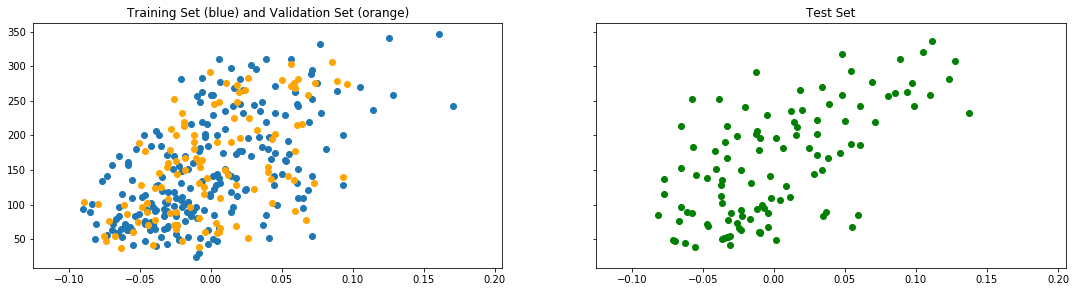

In [9]:
#load the diabetes dataset from sklearn.datasets
diabetes = datasets.load_diabetes()

#use only one feature, choose some datapoints to be your validation set (normally, and another set to be the test set)
x_diabetes_ = diabetes.data[:, 2]
y_diabetes_ = diabetes.target

#shuffle the data before splitting it, to make sure it is not ordered
np.random.seed(20)
shuffle_order = np.random.permutation(x_diabetes_.shape[0])
x_diabetes_ = x_diabetes_[shuffle_order]
y_diabetes_ = y_diabetes_[shuffle_order]

#split the data into training set, validation set, and test set
val_size = round(len(x_diabetes_) * 0.25) #take 25% of the data as a validation set (around 60 samples)
test_size = round(len(x_diabetes_) * 0.25) #take another 25% of the data as a test set
x_diabetes = x_diabetes_[ : -(val_size + test_size)]
y_diabetes = y_diabetes_[ : -(val_size + test_size)]
x_diabetes_val = x_diabetes_[-(val_size + test_size) : -test_size]
y_diabetes_val = y_diabetes_[-(val_size + test_size) : -test_size]
x_diabetes_test = x_diabetes_[-test_size : ]
y_diabetes_test = y_diabetes_[-test_size : ]

#plot the data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
ax1.scatter(x_diabetes, y_diabetes, c="C0")
ax1.scatter(x_diabetes_val, y_diabetes_val, c="orange")
ax1.set_title('Training Set (blue) and Validation Set (orange)')
ax2.scatter(x_diabetes_test, y_diabetes_test, c="green")
ax2.set_title('Test Set')
f.set_size_inches(18.5, 4.5)
plt.show()

2) Augment the data (add the 1's column for the bias, add the basis functions if any)

In [10]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train_val = np.concatenate((x_diabetes, x_diabetes_val))
y_diabetes_train_val = np.concatenate((y_diabetes, y_diabetes_val)) 

#add a column of 1 to the dataset for the bias term
degree = 1
X_diabetes_augmented = create_basis(x_diabetes_train_val, degree=degree)
X_diabetes_test_augmented = create_basis(x_diabetes_test, degree=degree)

learning_rate = 0.002

3) Standardize the data (according to the mean and the standard deviation of the training set)

In [11]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_test_augmented[:,1:] = (X_diabetes_test_augmented[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

4) initialize the other parameters and hyperparameters

In [12]:
#Initialize parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
test_size = x_diabetes_test.shape[0]

beta_old = np.random.uniform(0,0.2,(degree+1))
beta_new = beta_old

loss_old = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_old))
loss_old = np.dot(loss_old.T,loss_old) / train_size

delta_loss = -10000 #difference between new loss and old loss
iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

5) Train the model till update in beta is too small (smaller than delta_beta) or when the number of iterations reach max_iterations

Iteration no. 1, Mean Training RSS = 6492.82, Change in Mean RSS = -21644.873


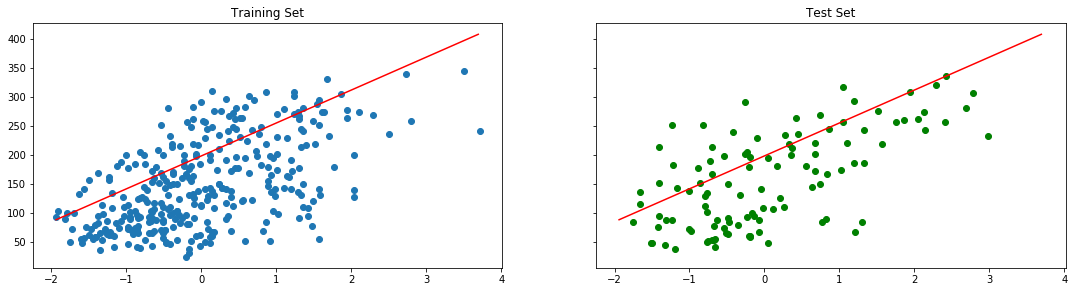

Iteration no. 2, Mean Training RSS = 4164.17, Change in Mean RSS = -2328.642


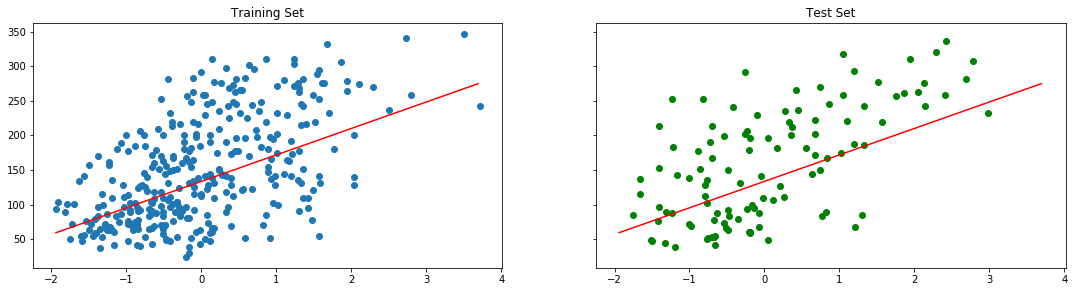

Iteration no. 3, Mean Training RSS = 3913.65, Change in Mean RSS = -250.525


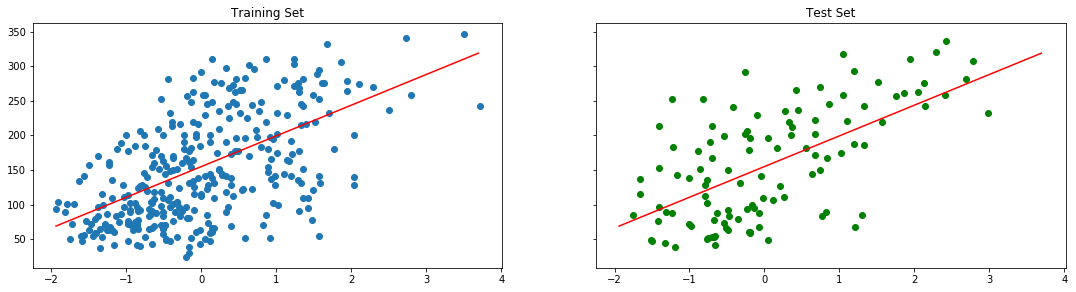

Iteration no. 4, Mean Training RSS = 3886.70, Change in Mean RSS = -26.952


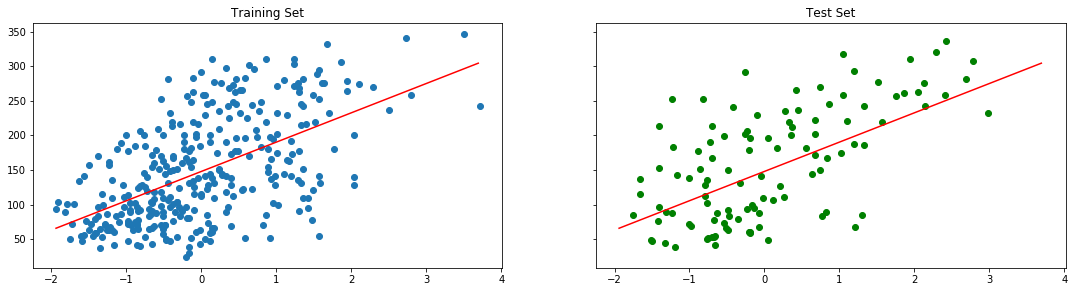

Iteration no. 5, Mean Training RSS = 3883.80, Change in Mean RSS = -2.900


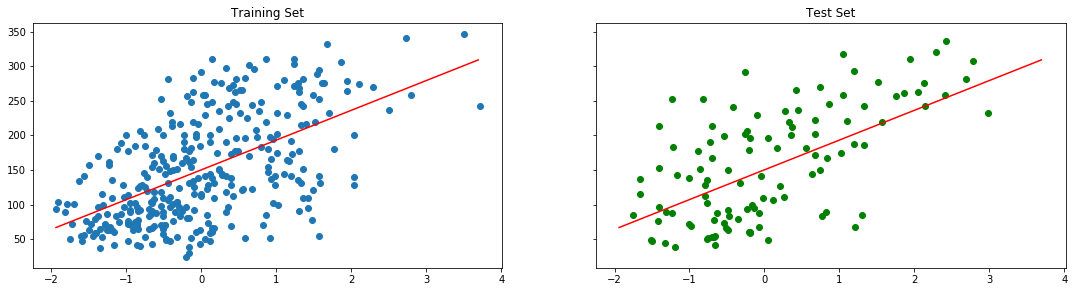

Iteration no. 6, Mean Training RSS = 3883.49, Change in Mean RSS = -0.312


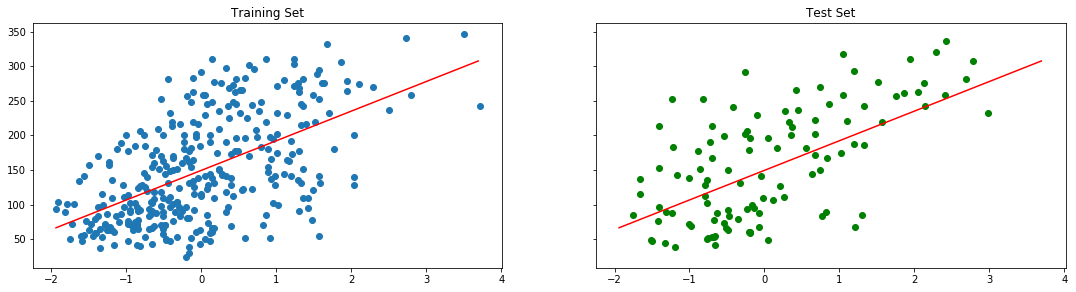

Iteration no. 7, Mean Training RSS = 3883.45, Change in Mean RSS = -0.034


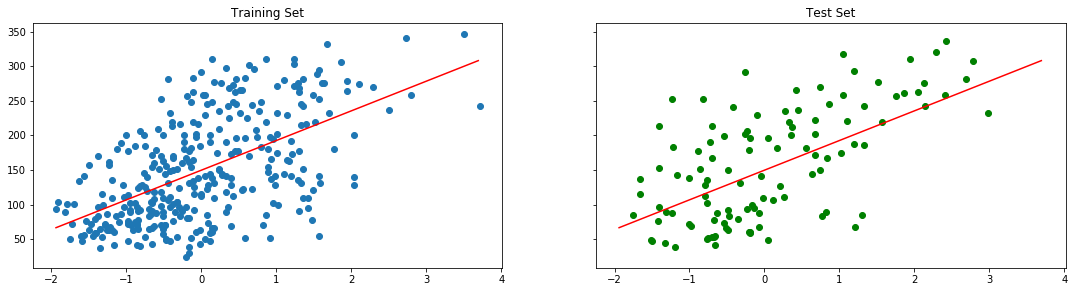

Iteration no. 8, Mean Training RSS = 3883.45, Change in Mean RSS = -0.004


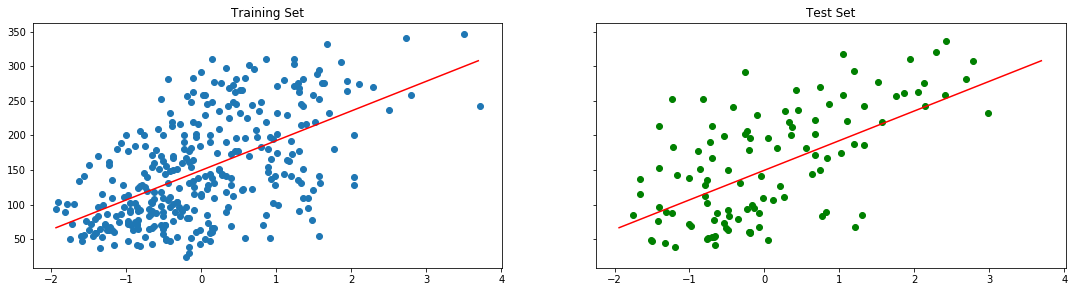

Mean Test RSS = 3926.97


In [13]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    gradient_loss = np.asarray(2 * np.dot(np.dot(X_diabetes_augmented.T, X_diabetes_augmented), beta_old) 
                               - 2 * np.dot(X_diabetes_augmented.T, y_diabetes_train_val))
    
    beta_new = beta_old - learning_rate * gradient_loss
    
    loss_new = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_new))
    loss_new = np.dot(loss_new.T,loss_new) / train_size
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    beta_old = beta_new
    
    iteration += 1
    
    print(f"Iteration no. {iteration}, Mean Training RSS = {loss_new:.2f}, Change in Mean RSS = {delta_loss:.3f}")
    
    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train_val, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_test_augmented[:,1], y_diabetes_test, c="green")
    ax2.set_title('Test Set')
    f.set_size_inches(18.5, 4.5)
    
    #plot the line
    limits = [min(x_diabetes_train_val), max(x_diabetes_train_val)]
    x_lim_ = np.arange(limits[0], limits[1], 0.01)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta_new)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()

test_loss = (y_diabetes_test - np.dot(X_diabetes_test_augmented, beta_new))
test_loss = np.dot(test_loss.T,test_loss) / test_size
print(f"Mean Test RSS = {test_loss:.2f}")

### Exercises

#### Exercise 1: Linear Regression using stochastic gradiend descent
Repeat example 3 using stochastic gradient descent (run example 3 to load the data and stanrdize it)

Augment the data (add the 1's column for the bias, add the basis functions if any)

In [14]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train_val = np.concatenate((x_diabetes, x_diabetes_val))
y_diabetes_train_val = np.concatenate((y_diabetes, y_diabetes_val)) 

#add a column of 1 to the dataset for the bias term
degree = 1
X_diabetes_augmented = create_basis(x_diabetes_train_val, degree=degree)
X_diabetes_test_augmented = create_basis(x_diabetes_test, degree=degree)

learning_rate = 0.002

Standardize the data (according to the mean and the standard deviation of the training set)

In [15]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_test_augmented[:,1:] = (X_diabetes_test_augmented[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

initialize the other parameters and hyperparameters

In [16]:
#Initialize parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
test_size = x_diabetes_test.shape[0]

beta_old = np.random.uniform(0,0.2,(degree+1))
beta_new = beta_old

loss_old = (y_diabetes_train_val - np.dot(X_diabetes_augmented, beta_old))
loss_old = np.dot(loss_old.T,loss_old) / train_size
loss_new = 0

delta_loss = -10000 #difference between new loss and old loss
iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

Train the model till update in beta is too small (smaller than delta_beta) or when the number of iterations reach max_iterations

Iteration no. 1, Mean Training RSS = 0.00, Change in Mean RSS = -28119.600


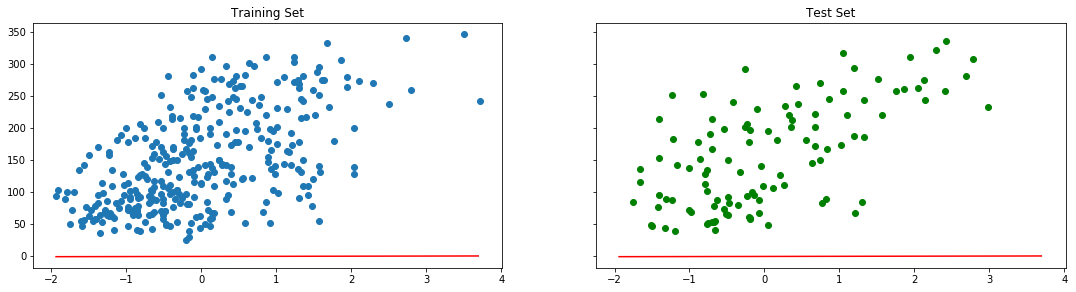

Iteration no. 2, Mean Training RSS = 0.00, Change in Mean RSS = 0.000


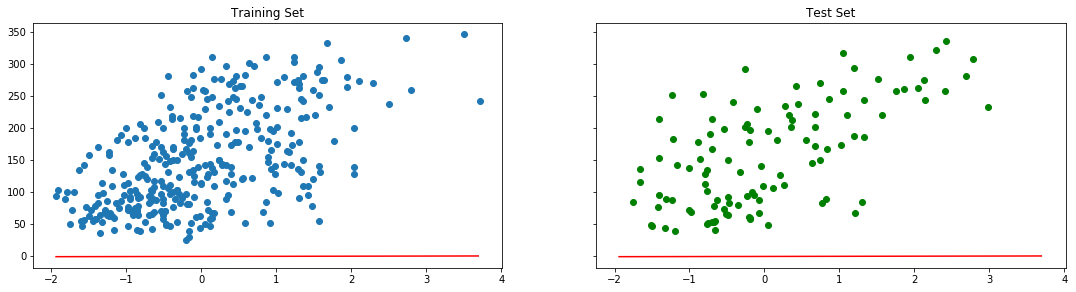

Mean Test RSS = 35.70


In [17]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    ######
    # write your code here
    # calculate the SGD, update the variable beta_new using the calculated gradient
    # make new beta_old equals calculated beta_new 
    # y_diabetes_train_val is your output vector, 
    # X_diabetes_augmented is your input matrix (number of samples x number of features + 1),
    # learning_rate is your learning rate
    #####
    
    iteration += 1
    
    ######
    # write your code here
    # calculate the training RSS and put it in loss_new
    #####
    loss_new /= train_size
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    print(f"Iteration no. {iteration}, Mean Training RSS = {loss_new:.2f}, Change in Mean RSS = {delta_loss:.3f}")
    
    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train_val, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_test_augmented[:,1], y_diabetes_test, c="green")
    ax2.set_title('Test Set')
    f.set_size_inches(18.5, 4.5)
    
    #plot the line
    limits = [min(x_diabetes_train_val), max(x_diabetes_train_val)]
    x_lim_ = np.arange(limits[0], limits[1], 0.01)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta_new)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()
    
######
    # write your code here
    # calculate the test RSS and put it in test_loss
#####
test_loss /= test_size
print(f"Mean Test RSS = {test_loss:.2f}")

#### Exercise 2: Use validation for determining lambda_ridge of a 20th order polynomial basis function
Use same dataset as in exercise 1

Augment the data (add the 1's column for the bias, add the basis functions if any)

In [18]:
#add the training set to the validation set as we don't tune any hyperparameter in this example
x_diabetes_train = x_diabetes
y_diabetes_train = y_diabetes

#add a column of 1 to the dataset for the bias term, and create the basis expansion
degree = 20
X_diabetes_augmented = create_basis(x_diabetes_train, degree=degree)
X_diabetes_val = create_basis(x_diabetes_val, degree=degree)
X_diabetes_test = create_basis(x_diabetes_test, degree=degree)

Standardize the data (according to the mean and the standard deviation of the training set)

In [19]:
#standardize training data (without the 1's column)
x_mean = X_diabetes_augmented[:,1:].mean(axis=0)
x_std = X_diabetes_augmented[:,1:].std(axis=0)
X_diabetes_augmented[:,1:] = (X_diabetes_augmented[:,1:] - x_mean) / x_std
X_diabetes_val[:,1:] = (X_diabetes_val[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the validation data
X_diabetes_test[:,1:] = (X_diabetes_test[:,1:] - x_mean) / x_std #use the mean and standard deviation of the training data not the test data

initialize the other parameters and hyperparameters

In [20]:
#Initialize the parameters and hyperparameters
train_size = X_diabetes_augmented.shape[0]
val_size = X_diabetes_val.shape[0]
test_size = x_diabetes_test.shape[0]

beta = np.zeros((degree+1))
loss_train = 0
loss_val = 0

#ranges to test lambda ridge for
lambda_ridge_range = [2**i for i in range(-20,5)]

validation_loss = {}
iteration = 0

Train the model

In [ ]:
for lambda_ridge in lambda_ridge_range:
    ######
    # write your code here
    # calculate the beta using Rigde Regression
    # y_diabetes_train is your output vector, 
    # X_diabetes_augmented is your input matrix (number of samples x number of features + 1),
    # lambda_ridge is your regularization weight
    #####
    
    ######
    # write your code here
    # calculate the training loss (RSS) and validation loss
    #####
    loss_train = loss_train / train_size
    loss_val = loss_val / val_size
    validation_loss[loss_val] = lambda_ridge
    
    iteration += 1

    print(f"Iteration no. {iteration}, lambda_ridge = {lambda_ridge}, Mean Train RSS = {loss_train}, Mean Validation RSS = {loss_val}")

    #plot the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True)
    ax1.scatter(X_diabetes_augmented[:,1], y_diabetes_train, c="C0")
    ax1.set_title('Training Set')
    ax2.scatter(X_diabetes_val[:,1], y_diabetes_val, c="orange")
    ax2.set_title('Validation Set')
    f.set_size_inches(18.5, 4.5)

    #plot the line
    limits = [min(x_diabetes_train), max(x_diabetes_train)]
    x_lim_ = np.arange(limits[0], limits[1], 0.001)
    A_lim_ = create_basis(x_lim_, degree = degree)
    A_lim_[:,1:] = (A_lim_[:,1:] - x_mean) / x_std
    y_lim_ = np.dot(A_lim_, beta)
    ax1.plot(A_lim_[:,1], y_lim_, c="red")
    ax2.plot(A_lim_[:,1], y_lim_, c="red")

    plt.show()

In [22]:
######
# write your code here
# get the optimum lambda_ridge from validation_loss, and use it to train the final model
#####